<font size="6"> GROUP 14 - Project Proposal </font>

By Eric Zhang, Primo Huang, Edmund Chu, Prajna Nayak

<font size="4"> INTRODUCTION </font>

There are a number of different factors that contribute to one's income. Our multivariable dataset provides information on each individual that we can use to predict the income of an individual. We want to predict if the income of a US citizen is less than or equal 50k, or above 50k.

We will be using the Census Income data set found on https://archive.ics.uci.edu/dataset/20/census+income. This 
data contains 32560 people's information and whether or not their income is under 50,000 or above.

We plan to use variables such as:
1) Age
2) work_class
3) education
4) race
5) sex

and possibly more to see if it is a factor contributing to one's income.

<font size = "4"> PRELIMINARY RESULTS</font>

First we load all the necessary libraries for us to analyze our data

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
income_col_names <- c("age", "work_class", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_status")
income_main <- read_csv("income.csv",col_names=income_col_names)
head(income_main)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): work_class, education, marital_status, occupation, relationship, ra...
dbl (6): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
income_want <- c("age", "work_class", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country", "income_status")
income = income_main[income_want]

head(income)

age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_status
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


Graphs (edmund): 

<font size = "4"> METHODS</font>

Income Distributio Plot

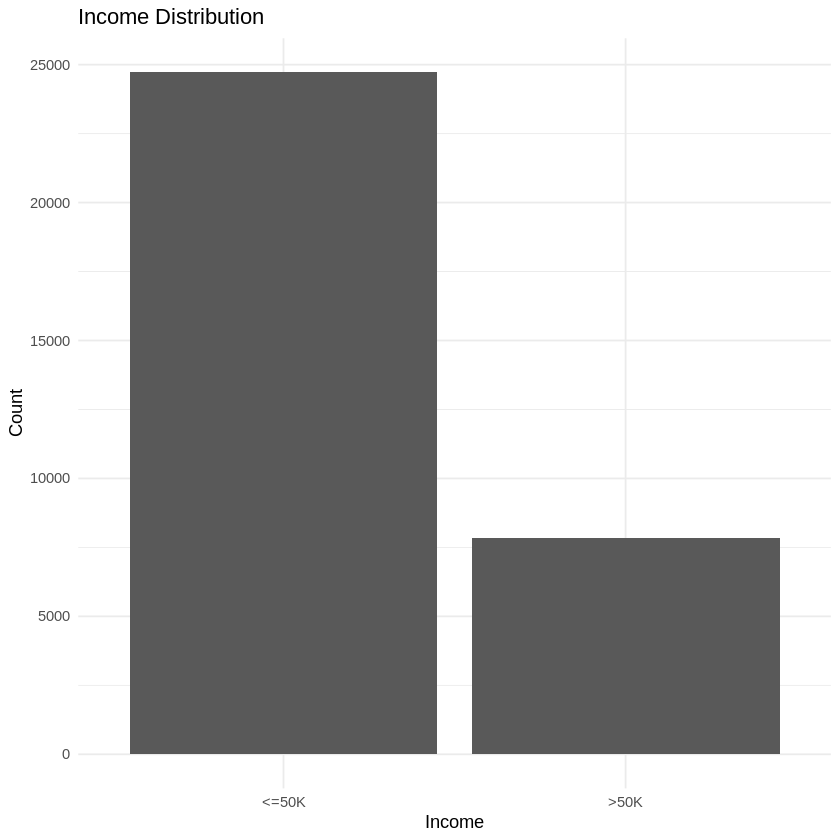

In [8]:
income_dist <- income |>
ggplot(aes(x = income_status)) +
geom_bar() +
labs(
    title = "Income Distribution",
    x = "Income",
    y = "Count"
  ) +
  theme_minimal()

income_dist





Age Distribution Plot

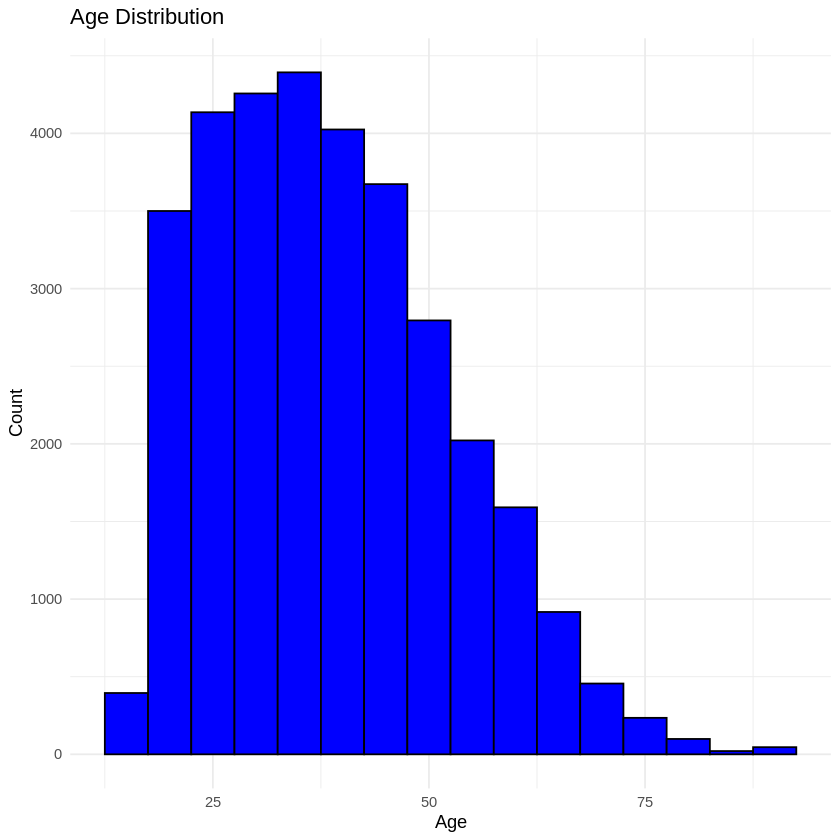

In [9]:
age_plot <- ggplot(income, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(
    title = "Age Distribution",
    x = "Age",
    y = "Count"
  ) +
  theme_minimal()

# Display the plot
print(age_plot)

BoxPlot of Age vs Income Status

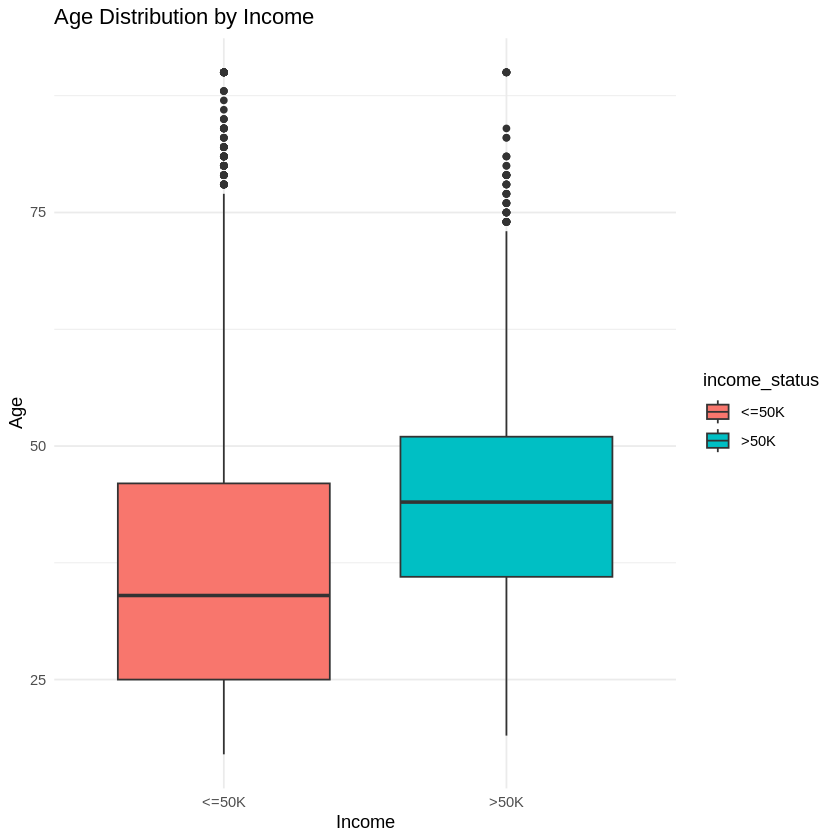

In [10]:
box_plot <- ggplot(income, aes(x = income_status, y = age, fill = income_status)) +
  geom_boxplot() +
  labs(
    title = "Age Distribution by Income",
    x = "Income",
    y = "Age"
  ) +
  theme_minimal()

# Display the plot
print(box_plot)

Work Class vs their Stats

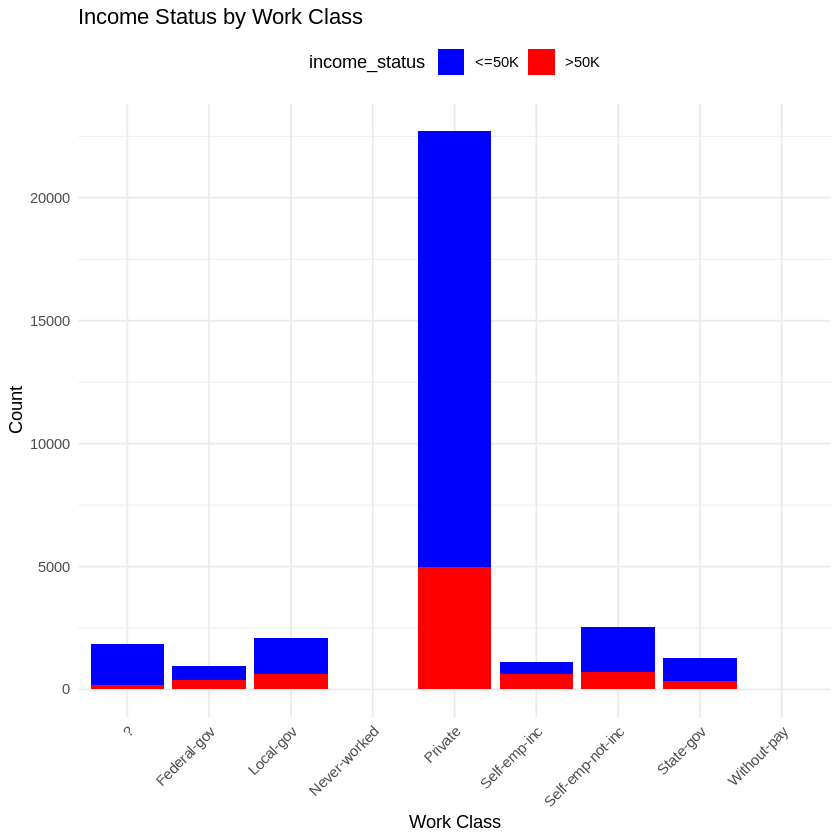

In [34]:
work_class_graph <- ggplot(income, aes(x = work_class, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Work Class") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

work_class_graph

In [ ]:
Education by Work Class

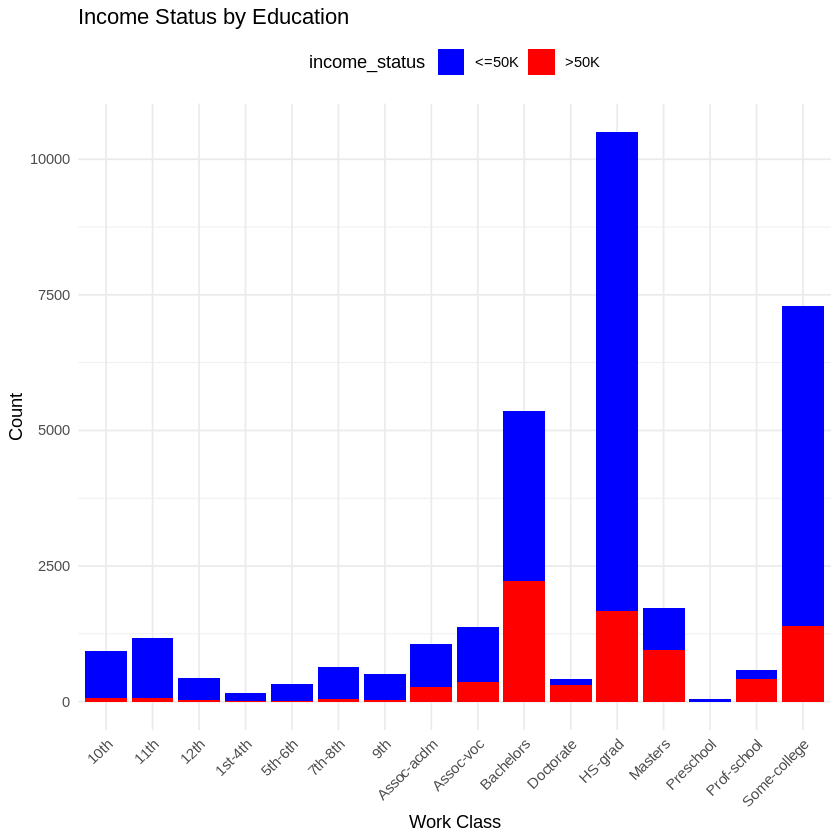

In [36]:
education_graph <- ggplot(income, aes(x = education, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Education") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

education_graph

Race Status by Education

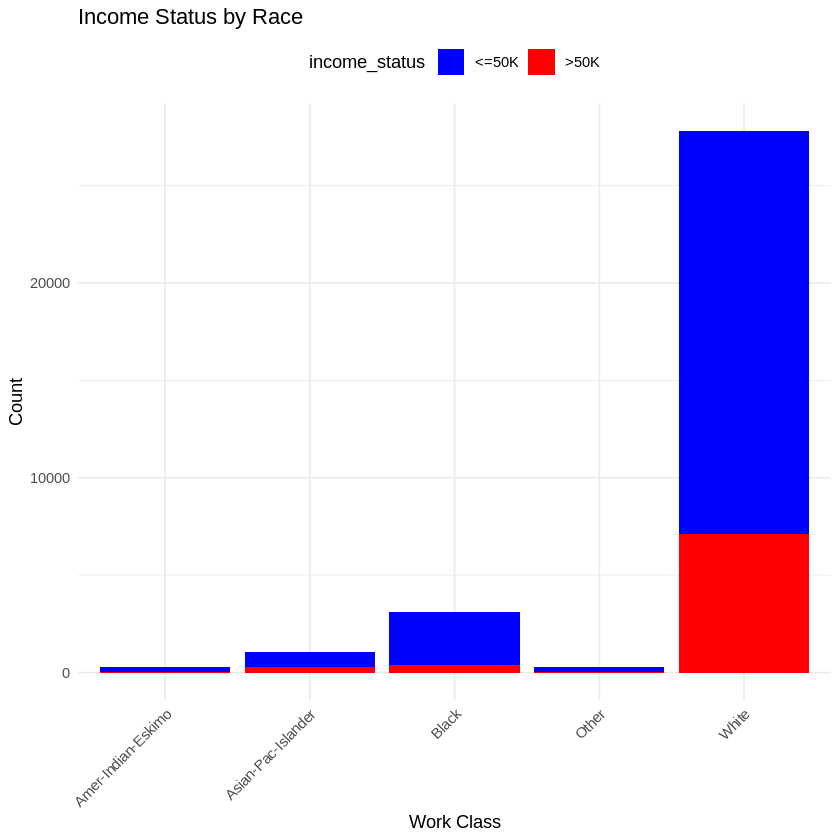

In [38]:
race_graph <- ggplot(income, aes(x = race, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Race") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

race_graph

Income Status by Gender

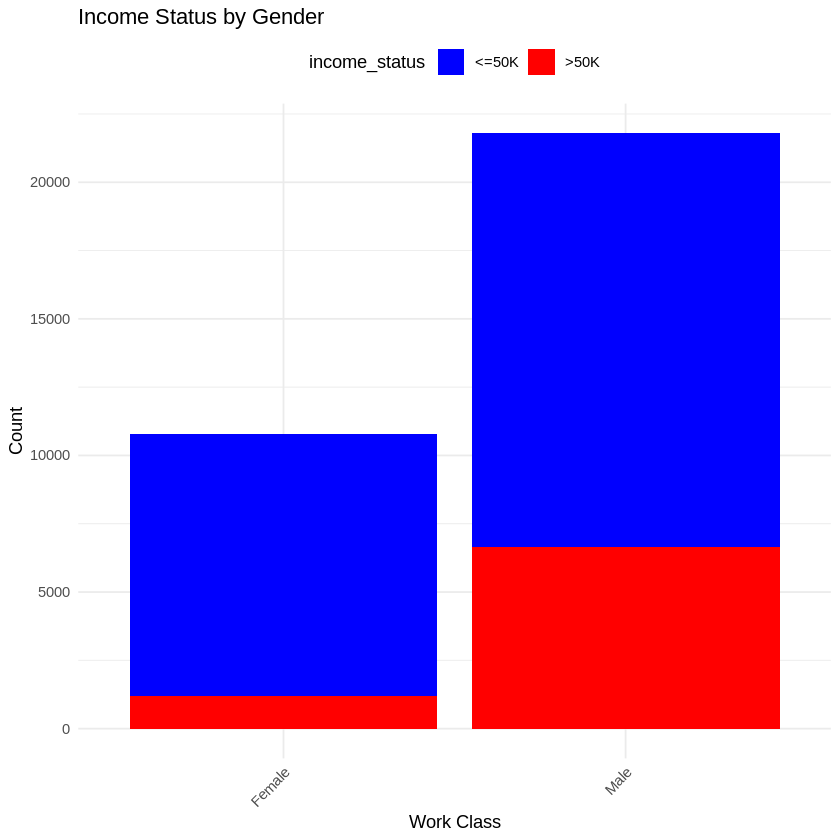

In [40]:
sex_graph <- ggplot(income, aes(x = sex, fill = income_status)) +
  geom_bar() +
  labs(x = "Work Class", y = "Count") +
  ggtitle("Income Status by Gender") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +  # Move the legend to the top
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

sex_graph